集成算法会考虑多个评估器的建模结果，汇总之后得到一个综合的结果，以此来获取比单个模型更好的回归或者分类表现。

多个模型集成成为的模型叫做集成评估器，组成集成评估器的每个模型都叫做基评估器，通常来说有三类集成算法：装袋法，提升法和stacking

装袋法的核心思想是构建多个相互独立的评估器，然后对其预测进行平均或多数表决原则来决定集成评估器的结果，装袋法的代表模型是随机森林。

提升法中，基评估器是相关的，是按顺序一一构建的，其核心思想是结合弱评估器的力量一次次对难以评估的样本进行预测，从而构成一个强评估器，提升法的代表模型有adaboost和梯度提升树。


n_estimators
森林中树木的数量，该值越大，往往模型效果就越好，但当其达到一定程度后，随机森林的精确性往往不再上升或开始波动，并且需要的计算量和内存也就越大，训练的时间也会越来越长。

In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [3]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size = 0.3)

In [5]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain, Ytrain)
rfc = rfc.fit(Xtrain, Ytrain)

score_c = clf.score(Xtest, Ytest)
score_r = clf.score(Xtest, Ytest)

print("single tree:{}".format(score_c)
     ,"Random Forest:{}".format(score_r))


single tree:0.9444444444444444 Random Forest:0.9444444444444444


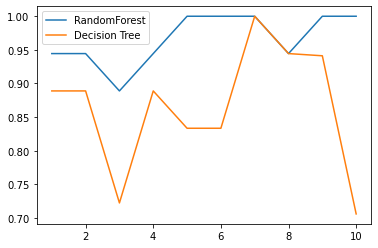

In [6]:
#进行十折交叉验证
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

plt.plot(range(1,11), rfc_s, label = "RandomForest")
plt.plot(range(1,11), clf_s, label = "Decision Tree")
plt.legend()
plt.show()

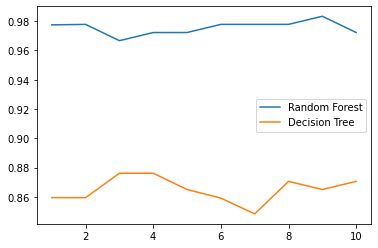

In [7]:
#进行十次十折交叉验证的结果，发现随机森林的准确率要比单棵决策树要高
#二者的波动轨迹也类似，因为单个决策树的准确率越高，随机森林的准确率也会越高
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv = 10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11), rfc_l, label = "Random Forest")
plt.plot(range(1,11), clf_l, label = "Decision Tree")
plt.legend()
plt.show()

0.9944444444444445 28


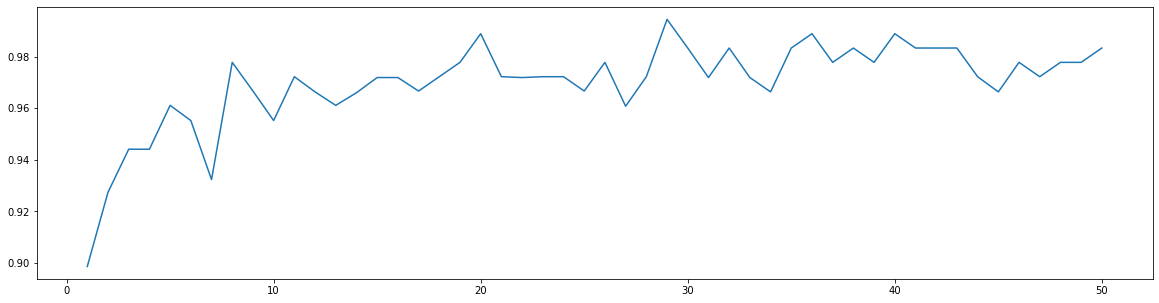

In [9]:
#n_estimators的学习曲线,运行时长三分半
superpa = []

for i in range(50):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10).mean()
    superpa.append(rfc_s)
print(max(superpa), superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,51),superpa)
plt.show()

In [10]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest, Ytest)

rfc.feature_importances_


array([0.14770255, 0.01843244, 0.018324  , 0.00404226, 0.0192447 ,
       0.05476078, 0.19988686, 0.00856074, 0.00886593, 0.18610652,
       0.08882764, 0.07536834, 0.16987724])

In [11]:
#用构造好的森林中的树对数据集X进行预测，返回每棵树预测的叶子节点
rfc.apply(Xtest)


array([[ 3,  5,  4, ..., 14,  9, 10],
       [ 6,  1,  2, ...,  3,  9, 10],
       [15,  5,  4, ..., 14,  4, 10],
       ...,
       [ 3,  6,  7, ..., 14,  9, 10],
       [17,  6, 12, ..., 22, 14, 17],
       [17,  6, 12, ..., 22, 14, 17]], dtype=int64)

In [12]:
rfc.predict(Xtest)
rfc.predict_proba(Xtest)

array([[0.  , 0.88, 0.12],
       [0.04, 0.96, 0.  ],
       [0.  , 0.28, 0.72],
       [0.  , 0.04, 0.96],
       [0.88, 0.08, 0.04],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.  , 0.12, 0.88],
       [0.  , 0.16, 0.84],
       [0.08, 0.72, 0.2 ],
       [0.04, 0.04, 0.92],
       [0.24, 0.68, 0.08],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.28, 0.72],
       [0.  , 0.16, 0.84],
       [0.04, 0.16, 0.8 ],
       [0.96, 0.04, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.12, 0.2 , 0.68],
       [0.12, 0.76, 0.12],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.8 , 0.12, 0.08],
       [0.  , 0.  , 1.  ],
       [0.  , 0.08, 0.92],
       [0.  , 1.  , 0.  ],
       [0.  , 0.2 , 0.8 ],
       [0.  , 1.  , 0.  ],
       [0.08, 0.68, 0.24],
       [0.  , 1.  , 0.  ],
       [0.68, 0.32, 0.  ],
       [0.04, 0.8 , 0.16],
       [1.  , 0.  , 0.  ],
       [0.16, 0.76, 0.08],
       [0.  , 1.  , 0.  ],
 

In [13]:
#调参
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
data = load_breast_cancer()

In [15]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [16]:
rfc = RandomForestClassifier(n_estimators=100, random_state = 90)
score_pre = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
score_pre

0.9648809523809524

0.9631265664160402 71


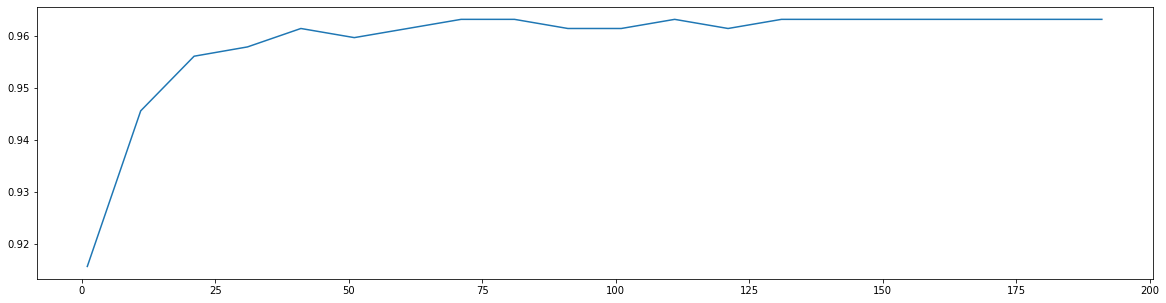

In [17]:
scorel = []
for i in range(0, 200, 10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)

plt.figure(figsize=[20,5])
plt.plot(range(1,201,10), scorel)
plt.show()


0.9666353383458647 71


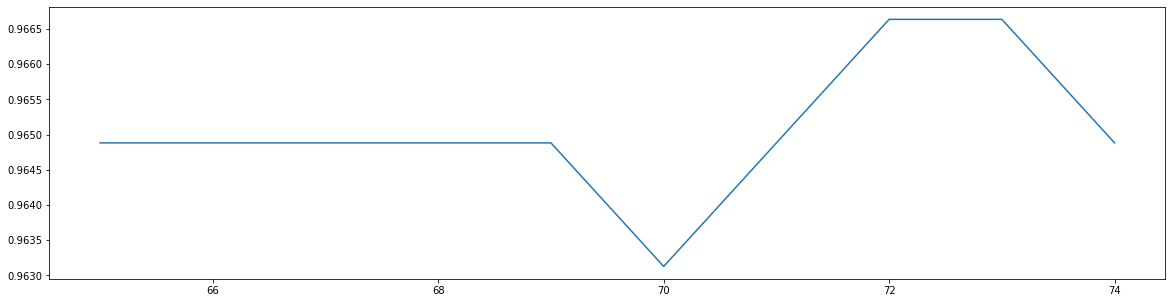

In [18]:
#由上一段代码可知最优值在71棵树左右的时候取到，那么就可以验证到具体建多少棵树能够得到最优值
#根据输出结果发现是建71或72棵树效果最好
scorel = []
for i in range(65,75):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)

plt.figure(figsize=[20,5])
plt.plot(range(65,75), scorel)
plt.show()

In [19]:
#调整max_depth
param_grid = {'max_depth': np.arange(1, 20, 1)}

rfc = RandomForestClassifier(n_estimators=71,
                            random_state=90
                            )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=71, random_state=90),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [20]:
GS.best_params_

{'max_depth': 8}

In [21]:
GS.best_score_

0.9666353383458647

In [22]:
 #调整max_features
param_grid = {'max_features': np.arange(5, 30, 1)}

rfc = RandomForestClassifier(n_estimators=71,
                            random_state=90
                            )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=71, random_state=90),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [23]:
GS.best_params_

{'max_features': 28}

In [24]:
GS.best_score_

0.968421052631579

In [25]:
#调整min_samples_leaf
param_grid = {'min_samples_leaf': np.arange(1, 11, 1)}

rfc = RandomForestClassifier(n_estimators=71,
                            random_state=90,
                             max_depth=8,
                             max_features=28
                            )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=8, max_features=28,
                                              n_estimators=71,
                                              random_state=90),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [26]:
GS.best_params_

{'min_samples_leaf': 2}

In [27]:
GS.best_score_

0.968421052631579